In [9]:
'''
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install plotly
! pip install seaborn

! pip install statsmodels
! pip install sklearn
'''

'\n! pip install pandas\n! pip install numpy\n! pip install matplotlib\n! pip install plotly\n! pip install seaborn\n\n! pip install statsmodels\n! pip install sklearn\n'

In [10]:
# Step 0. Load libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', delimiter=';')

In [12]:
# 1.1 Get basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [13]:
# 1.2 Take a sample
df.head(7)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
# 1.2 Take a simple description for numerical values
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [15]:
# Hints, Meaning of each attribute:
'''
Age (numerical)
Job: Type of Job (categorical)
Marital: marital status (categorical)
Education: (categorical)
Default: has credit in default? (categorical)
Housing: has housing loan? (categorical)
Loan: has personal loan? (categorical)
contact: contact communication type (categorcial)
month: last contact month of year (categorical)
day_of_week: last contact day of the week (categorical)
duration: last contact duration, in seconds (numerical)
    Important note: this output highly affects the output target (if duration=0, then y='no'). 
    Yet, the duration is not known before a call is performed. Also, after the end of the call, y is obviously known. 
    Consider if you should include it or not for a realistic predictive model.
campaign: number of contacts performed during this campaign and for this client (numerical)
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
previous: number of contacts performed before this campaign and for this client (numerical)
poutcome: outcome of the previous marketing campaign (categorical)
    Important note: this attribute has three categories: 'failure', 'success' and 'non-existent'. 86% of the data falls into 'non-existent' category.
emp.var.rate: employment variation rate - quarterly indicator (numeric)
cons.price.idx: consumer price index- monthly indicator (numeric)
cons.conf.idx: consumer confidence index - monthly indicator (numeric)
euribor3m: euribor 3 month rate: - daily indicator(numeric)
nr.employed: number of employees - quarterly indicator (numeric)

Target variable:
y: has the client subscribed a term deposit?
'''

"\nAge (numerical)\nJob: Type of Job (categorical)\nMarital: marital status (categorical)\nEducation: (categorical)\nDefault: has credit in default? (categorical)\nHousing: has housing loan? (categorical)\nLoan: has personal loan? (categorical)\ncontact: contact communication type (categorcial)\nmonth: last contact month of year (categorical)\nday_of_week: last contact day of the week (categorical)\nduration: last contact duration, in seconds (numerical)\n    Important note: this output highly affects the output target (if duration=0, then y='no'). \n    Yet, the duration is not known before a call is performed. Also, after the end of the call, y is obviously known. \n    Consider if you should include it or not for a realistic predictive model.\ncampaign: number of contacts performed during this campaign and for this client (numerical)\npdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contac

In [16]:
df_raw = df.copy()

In [17]:
# Drop NAs & duplicates
df_raw = df_raw.dropna().drop_duplicates()
#df = df.reset_index(inplace = False)[['url','is_spam']]

In [18]:
# Step 2. Make a basic EDA

df_raw.shape
print(f'The Dataset has {df_raw.shape[0]} "observations" with {df_raw.shape[1]} columns')

df_len = len(df_raw)

The Dataset has 41176 "observations" with 21 columns


Categorical features analysis

There are 11 "jobs" in 41176 observations 

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64


<AxesSubplot:>

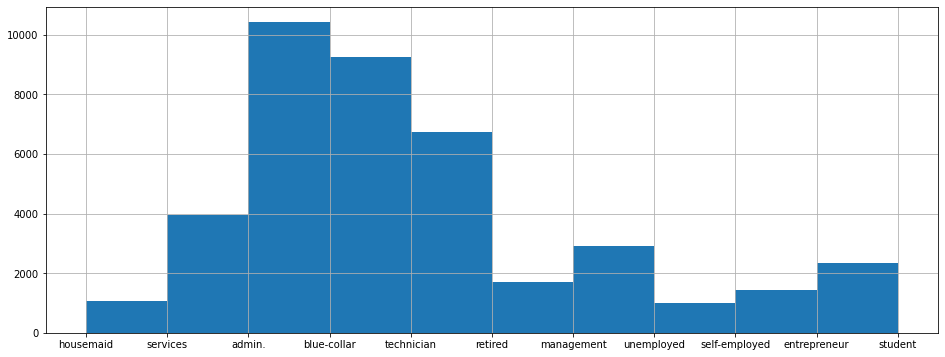

In [19]:
# 'job' analysis

# Replace unknown with mode:
condition  = (df_raw['job'] == 'unknown')
df_raw.loc[condition, 'job'] = df_raw['job'].mode()

nuniques = df_raw['job'].nunique()
counts = df_raw['job'].value_counts()
print(f'There are {nuniques} "jobs" in {len(df_raw)} observations \n')
print(f'{counts}')

fig = plt.figure(figsize=(16,6))
ax = fig.gca()
df_raw['job'].hist(ax=ax)

There are 3 "maritals" in 41176 observations 

married     24921
single      11564
divorced     4611
Name: marital, dtype: int64


<AxesSubplot:>

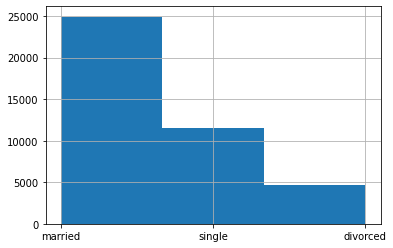

In [20]:
# 'marital' analysis

condition  = (df_raw['marital'] == 'unknown')
df_raw.loc[condition, 'marital'] = df_raw['marital'].mode()

nuniques = df_raw['marital'].nunique()
counts = df_raw['marital'].value_counts()
print(f'There are {nuniques} "maritals" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw['marital'].hist(bins=nuniques)

There are 5 "educations" in 41176 observations 

middle_school          12512
university.degree      12164
high.school             9512
professional.course     5240
illiterate                18
Name: education, dtype: int64


<AxesSubplot:>

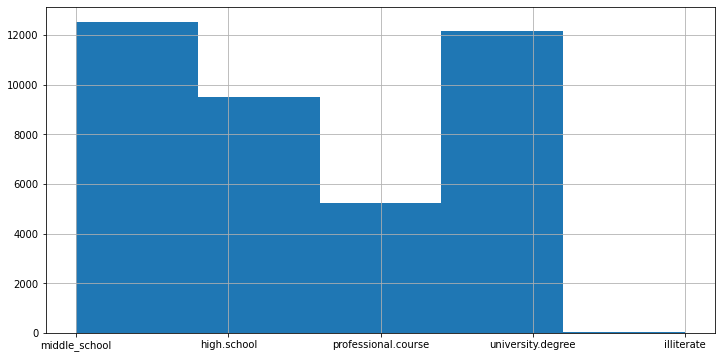

In [21]:
# 'education' analysis

# Replace unknown with mode:
condition  = (df_raw['education'] == 'unknown')
df_raw.loc[condition, 'education'] = df_raw['education'].mode()

# Insert categories 'basic.9y','basic.6y','basic4y' into 'middle_school':
df_raw['education'] = df_raw['education'].replace(['basic.9y', 'basic.6y', 'basic.4y'], 'middle_school')

nuniques = df_raw['education'].nunique()
counts = df_raw['education'].value_counts()
print(f'There are {nuniques} "educations" in {len(df_raw)} observations \n')
print(f'{counts}')

fig = plt.figure(figsize=(12,6))
ax = fig.gca()
df_raw['education'].hist(ax=ax, bins=nuniques)

There are 2 "defaults" in 41176 observations 

no     41173
yes        3
Name: default, dtype: int64


<AxesSubplot:>

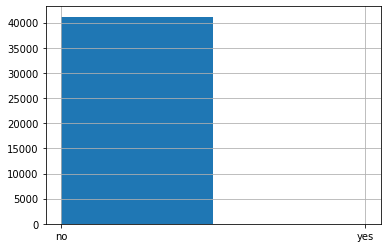

In [22]:
# 'default' analysis

# Replace unknown with mode:
condition  = (df_raw['default'] == 'unknown')
df_raw.loc[condition, 'default'] = 'no'

nuniques = df_raw['default'].nunique()
counts = df_raw['default'].value_counts()
print(f'There are {nuniques} "defaults" in {len(df_raw)} observations \n')
print(f'{counts}')

fig = plt.figure(figsize=(6,4))
ax = fig.gca()
df_raw['default'].hist(ax=ax, bins=nuniques)

Pendiente: pasar de categorical(yes, no) to boolean

There are 2 "housings" in 41176 observations 

yes    21571
no     18615
Name: housing, dtype: int64


<AxesSubplot:>

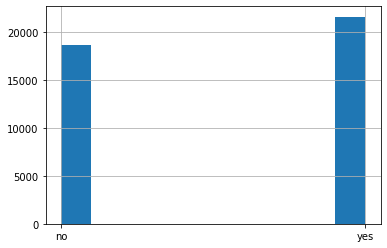

In [23]:
# 'housing' analysis

# Replace unknown with mode:
condition  = (df_raw['housing'] == 'unknown')
df_raw.loc[condition, 'housing'] = df_raw['housing'].mode()

nuniques = df_raw['housing'].nunique()
counts = df_raw['housing'].value_counts()
print(f'There are {nuniques} "housings" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw['housing'].hist()

There are 2 "loans" in 41176 observations 

no     33938
yes     6248
Name: loan, dtype: int64


<AxesSubplot:>

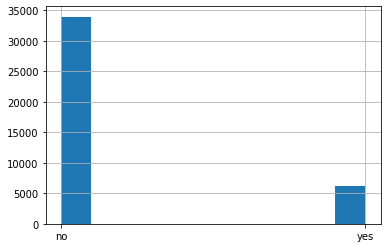

In [24]:
# 'loan' analysis

# Replace unknown with mode:
condition  = (df_raw['loan'] == 'unknown')
df_raw.loc[condition, 'loan'] = df_raw['loan'].mode()

nuniques = df_raw['loan'].nunique()
counts = df_raw['loan'].value_counts()
print(f'There are {nuniques} "loans" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw['loan'].hist()

There are 2 "contacts" in 41176 observations 

cellular     26135
telephone    15041
Name: contact, dtype: int64


<AxesSubplot:>

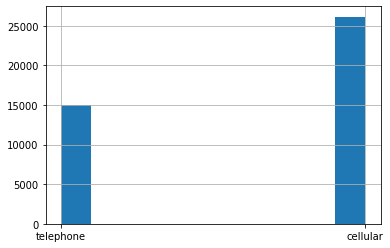

In [25]:
# 'contact' analysis

# Replace unknown with mode:
condition  = (df_raw['contact'] == 'unknown')
df_raw.loc[condition, 'contact'] = df_raw['contact'].mode()

nuniques = df_raw['contact'].nunique()
counts = df_raw['contact'].value_counts()
print(f'There are {nuniques} "contacts" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw['contact'].hist()

There are 10 "months" in 41176 observations 

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64


<AxesSubplot:>

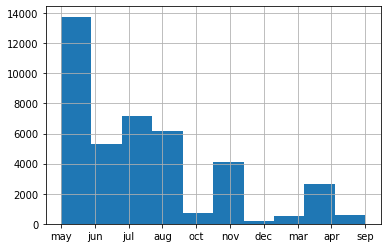

In [26]:
# 'month' analysis

nuniques = df_raw['month'].nunique()
counts = df_raw['month'].value_counts()
print(f'There are {nuniques} "months" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw['month'].hist()

There are 5 "day_of_week" in 41176 observations 

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64


<AxesSubplot:>

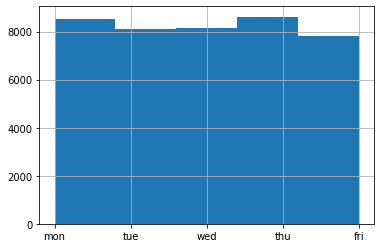

In [27]:
# 'day_of_week' analysis

nuniques = df_raw['day_of_week'].nunique()
counts = df_raw['day_of_week'].value_counts()
print(f'There are {nuniques} "day_of_week" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw['day_of_week'].hist(bins=5)

There are 3 "poutcomes" in 41176 observations 

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64


<AxesSubplot:>

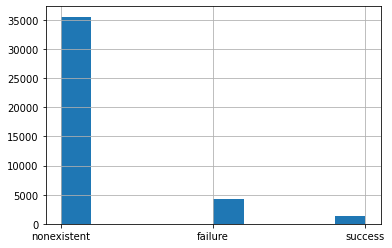

In [28]:
# 'poutcome' analysis

nuniques = df_raw['poutcome'].nunique()
counts = df_raw['poutcome'].value_counts()
print(f'There are {nuniques} "poutcomes" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw['poutcome'].hist()

Numerical features analysis

In [29]:
df_interim = df_raw.copy()

In [30]:
df_raw = df_interim.copy()

There are 78 "ages" in 41176 observations 

31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64


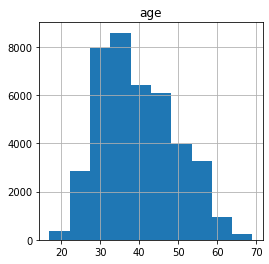

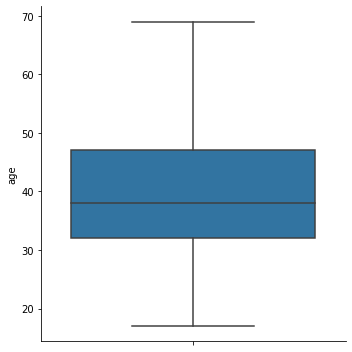

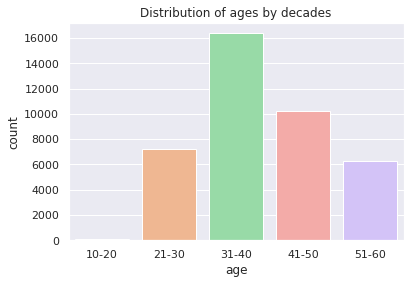

In [31]:
# 'age' analysis

nuniques = df_raw['age'].nunique()
counts = df_raw['age'].value_counts()
print(f'There are {nuniques} "ages" in {len(df_raw)} observations \n')
print(f'{counts}')

# remove 'age outliers
df_raw = df_raw.drop(df_raw[df_raw.age > 69].index)

df_raw.hist('age', grid=True, figsize=(4,4), bins=10)
plt.show()

sns.catplot(y='age', kind='box', data=df_raw)
plt.show()

# Convert age into categorical data by creating age-groups of ten years
df_raw['age'] = pd.cut(x=df_raw['age'], bins=[10, 20, 30, 40, 50, 60], 
                       labels=['10-20', '21-30', '31-40', '41-50', '51-60'])

# ages distribution by decade
sns.set(style='darkgrid')
sns.countplot(x=df_raw['age'], palette='pastel')
plt.title('Distribution of ages by decades')
plt.show()

There are 995 "durations" in 39757 observations 

85     168
90     167
136    167
73     166
124    162
      ... 
907      1
859      1
879      1
987      1
928      1
Name: duration, Length: 995, dtype: int64


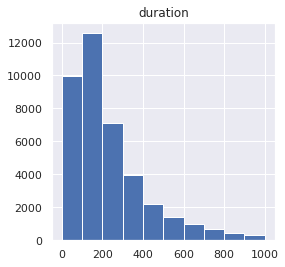

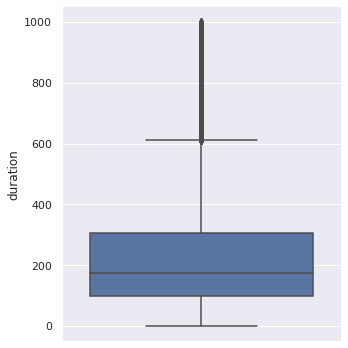

In [32]:
# 'duration' analysis

# remove rows which duration = 0
df_raw = df_raw.drop(df_raw[df_raw.duration == 0].index)

# remove duration outliers
df_raw = df_raw.drop(df_raw[df_raw.duration > 1000].index)

nuniques = df_raw['duration'].nunique()
counts = df_raw['duration'].value_counts()
print(f'There are {nuniques} "durations" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw.hist('duration', grid=True, figsize=(4,4), bins=10)
plt.show()

sns.catplot(y='duration', kind='box', data=df_raw)
plt.show()

There are 42 "campaigns" in 41176 observations 

1     17059
2     10159
3      5135
4      2555
5      1562
6       946
7       610
8       390
9       273
10      217
11      172
12      122
13       90
14       68
17       55
16       50
15       50
18       33
20       30
19       25
21       24
22       17
23       16
24       15
27       11
29       10
28        8
25        8
31        7
26        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64


<AxesSubplot:>

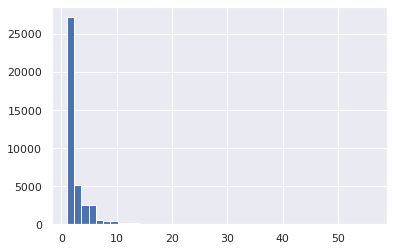

In [33]:
# 'campaign' analysis

nuniques = df_raw['campaign'].nunique()
counts = df_raw['campaign'].value_counts()
print(f'There are {nuniques} "campaigns" in {df_len} observations \n')
print(f'{counts}')

# 'campaign' to categorical
df_raw['campaign'] = pd.Categorical(df_raw.campaign)
df_raw['campaign'].dtypes

df_raw['campaign'].hist(bins=nuniques)


There are 27 "pdays" in 41176 observations 

999    38373
3        393
6        372
4        108
9         59
2         58
7         55
12        54
10        49
5         42
13        33
11        27
1         26
15        22
14        18
8         16
0         15
16        11
17         8
18         7
22         3
21         2
19         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64


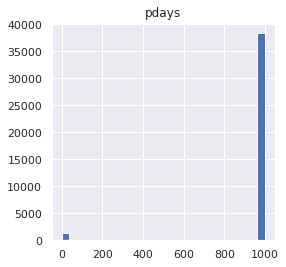

In [34]:
# 'pdays' analysis

nuniques = df_raw['pdays'].nunique()
counts = df_raw['pdays'].value_counts()
print(f'There are {nuniques} "pdays" in {df_len} observations \n')
print(f'{counts}')

df_raw.hist('pdays', grid=True, figsize=(4,4), bins=nuniques)
plt.show()


There are 8 "previous" in 39757 observations 

0    34436
1     4350
2      689
3      198
4       61
5       18
6        4
7        1
Name: previous, dtype: int64


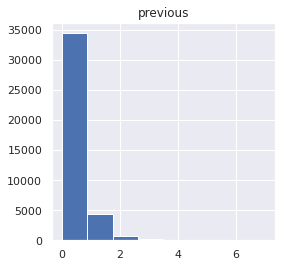

In [35]:
# 'previous' analysis

nuniques = df_raw['previous'].nunique()
counts = df_raw['previous'].value_counts()
print(f'There are {nuniques} "previous" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw.hist('previous', grid=True, figsize=(4,4), bins=nuniques)
plt.show()

There are 10 "emp.var.rate" in 39757 observations 

 1.4    15819
-1.8     8831
 1.1     7599
-0.1     3594
-2.9     1566
-3.4      924
-1.7      693
-1.1      578
-3.0      143
-0.2       10
Name: emp.var.rate, dtype: int64


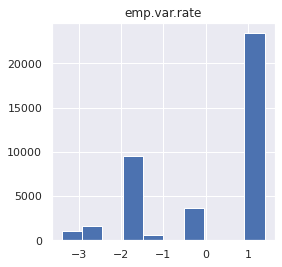

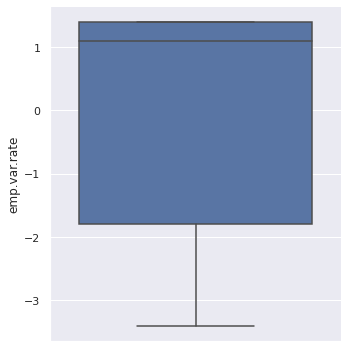

In [36]:
# 'emp.var.rate' analysis

nuniques = df_raw['emp.var.rate'].nunique()
counts = df_raw['emp.var.rate'].value_counts()
print(f'There are {nuniques} "emp.var.rate" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw.hist('emp.var.rate', grid=True, figsize=(4,4), bins=nuniques)
plt.show()

sns.catplot(y='emp.var.rate', kind='box', data=df_raw)
plt.show()

There are 26 "cons.price.idx" in 39757 observations 

93.994    7599
93.918    6477
92.893    5661
93.444    5072
94.465    4270
93.200    3531
93.075    2346
92.963     699
92.201     694
92.431     378
92.649     314
94.215     275
94.199     269
92.843     251
93.369     248
92.379     232
94.055     213
94.027     205
94.601     186
93.876     185
92.469     173
92.713     143
93.749     140
94.767     123
93.798      63
92.756      10
Name: cons.price.idx, dtype: int64


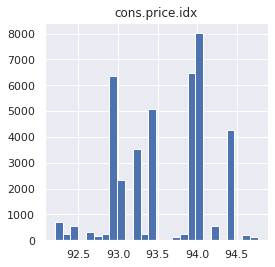

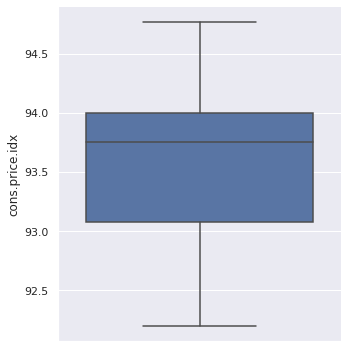

In [37]:
# 'cons.price.idx' analysis

nuniques = df_raw['cons.price.idx'].nunique()
counts = df_raw['cons.price.idx'].value_counts()
print(f'There are {nuniques} "cons.price.idx" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw.hist('cons.price.idx', grid=True, figsize=(4,4), bins=nuniques)
plt.show()

sns.catplot(y='cons.price.idx', kind='box', data=df_raw)
plt.show()

There are 315 "euribor3m" in 39757 observations 

4.857    2824
4.962    2536
4.963    2421
4.961    1850
4.856    1177
         ... 
3.743       1
3.282       1
3.669       1
3.488       1
0.956       1
Name: euribor3m, Length: 315, dtype: int64


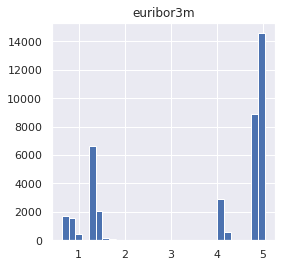

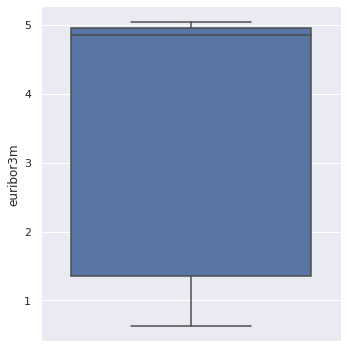

In [38]:
# 'euribor3m' analysis

nuniques = df_raw['euribor3m'].nunique()
counts = df_raw['euribor3m'].value_counts()
print(f'There are {nuniques} "euribor3m" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw.hist('euribor3m', grid=True, figsize=(4,4), bins=30)
plt.show()

sns.catplot(y='euribor3m', kind='box', data=df_raw)
plt.show()

There are 11 "nr.employed" in 39757 observations 

5228.1    15819
5099.1     8258
5191.0     7599
5195.8     3594
5076.2     1566
5017.5      924
4991.6      693
4963.6      578
5008.7      573
5023.5      143
5176.3       10
Name: nr.employed, dtype: int64


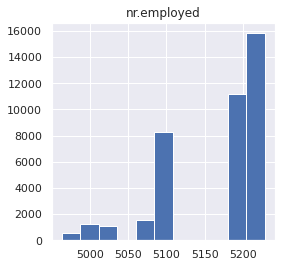

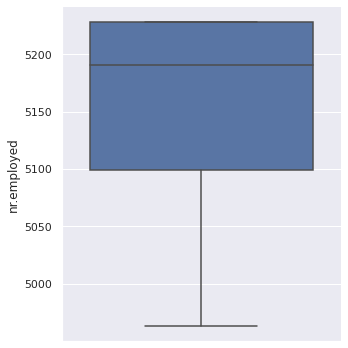

In [39]:
# 'nr.employed' analysis

nuniques = df_raw['nr.employed'].nunique()
counts = df_raw['nr.employed'].value_counts()
print(f'There are {nuniques} "nr.employed" in {len(df_raw)} observations \n')
print(f'{counts}')

df_raw.hist('nr.employed', grid=True, figsize=(4,4), bins=nuniques)
plt.show()

sns.catplot(y='nr.employed', kind='box', data=df_raw)
plt.show()

Correlations analysis

In [40]:
# drop columns due to high correlations
correlation_deletes = ['cons.price.idx', 'nr.employed', 'euribor3m']

df_raw = df_raw.drop(columns=correlation_deletes)

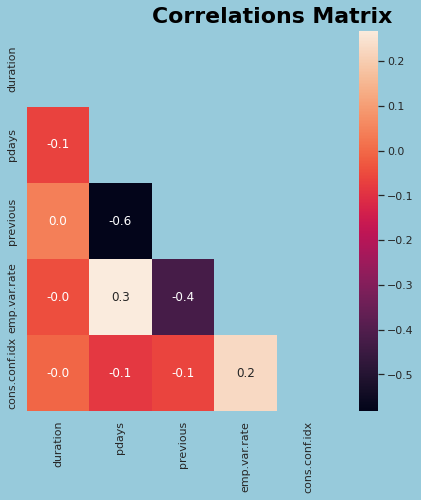

In [41]:
# Correlations analysis

df_corr = df_raw.corr().transpose()

background_color = "#97CADB"
fig = plt.figure(figsize=(7,7))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 

mask = np.triu(np.ones_like(df_corr))
ax0.text(2,-0.1, "Correlations Matrix", fontsize=22, fontweight='bold', color="#000000")
sns.heatmap(df_corr, mask=mask, fmt=".1f", annot=True)
plt.show()

In [42]:
print(f'There is high correlation between:\n previous - pdays : -0,6\n cons.price.idx - emp.var.rate : 0,8\n euribor3m - cons.price.idx: 0,7\n nr.employed - emp.var.rate: 0,9\n nr.employed - euribor3m: 0,9 ')

There is high correlation between:
 previous - pdays : -0,6
 cons.price.idx - emp.var.rate : 0,8
 euribor3m - cons.price.idx: 0,7
 nr.employed - emp.var.rate: 0,9
 nr.employed - euribor3m: 0,9 


In [43]:
df_raw.head(7)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,y
0,51-60,housemaid,married,middle_school,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,-36.4,no
1,51-60,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,-36.4,no
2,31-40,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,-36.4,no
3,31-40,admin.,married,middle_school,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,-36.4,no
4,51-60,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,-36.4,no
5,41-50,services,married,middle_school,no,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,-36.4,no
6,51-60,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,-36.4,no


In [44]:
df_interim2 = df_raw.copy()

Target data analysis

There are 2 "ys" in 39757 observations 

no     35899
yes     3858
Name: y, dtype: int64


<AxesSubplot:>

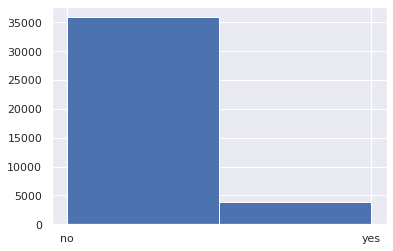

In [45]:
# target data 'y' analysis

# Check if data is balanced:
nuniques = df_raw['y'].nunique()
counts = df_raw['y'].value_counts()
print(f'There are {nuniques} "ys" in {len(df_raw)} observations \n')
print(f'{counts}')

fig = plt.figure(figsize=(6,4))
ax = fig.gca()
df_raw['y'].hist(ax=ax, bins=nuniques)

In [46]:
# Step 3. Create and evaluate model - Define your approach and goals

In [47]:
# 3.1 Perform model fit - A

In [48]:
# 3.3 Calculate metrics on model A

In [49]:
# Step 4. Write up your conclusions